1. Transformasi Twirl

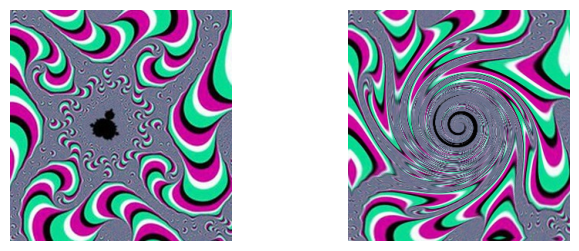

In [23]:
import matplotlib.pyplot as plt
from skimage.transform import swirl
import cv2 

image = cv2.imread("foto/ungu.jpg")
swirled = swirl(image, rotation=0, strength=20, radius=200)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True)

ax0.imshow(image, cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')

plt.show()

2. Translation

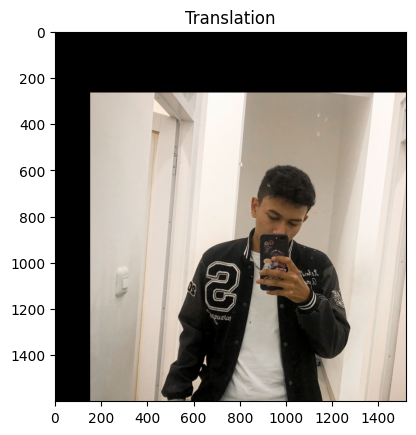

In [21]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("foto/arif.jpeg") 
h, w = image.shape[:2]

half_height, half_width = h//6, w//10 
transition_matrix = np.float32([[1, 0, half_width], [0, 1, half_height]])

img_transition = cv.warpAffine(image, transition_matrix, (w, h))
plt.imshow(cv.cvtColor(img_transition, cv.COLOR_BGR2RGB))
plt.title("Translation") 

plt.show()

3. Rotation

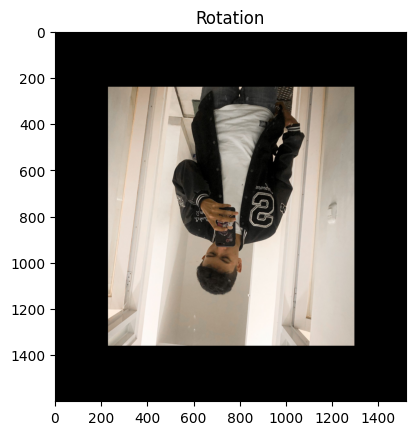

In [28]:
import cv2 as cv 
import matplotlib.pyplot as plt

image = cv.imread("foto/arif.jpeg")
h, w = image.shape[:2]

rotation_matrix = cv.getRotationMatrix2D((w/2,h/2), -180, 0.7)
rotated_image = cv.warpAffine(image, rotation_matrix, (w, h))

plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotation") 

plt.show()

4. Interpolation

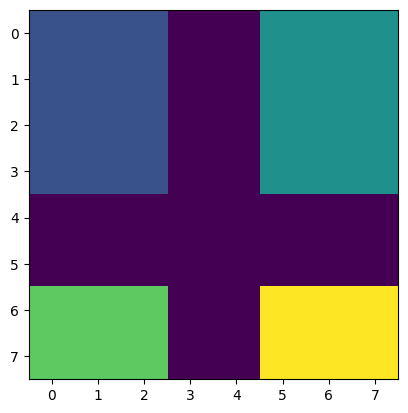

Background size 28
Size of first region: 12
Sum of first region: 7.402575449967201


In [28]:
import mahotas as mh
import numpy as np
from pylab import imshow, show 

regions = np.zeros((8,8), bool)

regions[:4,:3] = 1 
regions[6:,:3] = 1
regions[:4,5:] = 1 
regions[6:,5:] = 1 

labeled, nr_objects = mh.label(regions)

imshow(labeled, interpolation='nearest')
show()

labeled,nr_objects = mh.label(regions, np.ones((3,3), bool))
sizes = mh.labeled.labeled_size(labeled)
print('Background size', sizes[0])
print('Size of first region: {}'.format(sizes[1]))

array = np.random.random_sample(regions.shape)
sums = mh.labeled_sum(array, labeled)
print('Sum of first region: {}'.format(sums[1]))


5. Skala Interpolation Miring

Text(0.5, 1.0, 'Skewed Interpolation Scale')

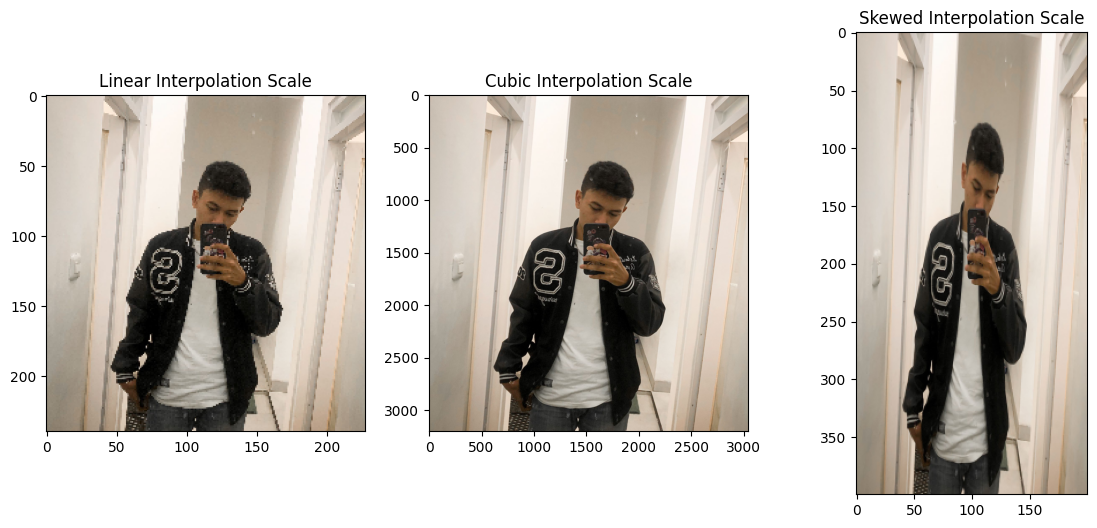

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("foto/arif.jpeg")
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

image_scaled = cv.resize(image, None, fx=0.15, fy=0.15)

ax[0].imshow(cv.cvtColor(image_scaled, cv.COLOR_BGR2RGB))
ax[0].set_title("Linear Interpolation Scale")

image_scaled_2 = cv.resize(image, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)

ax[1].imshow(cv.cvtColor(image_scaled_2, cv.COLOR_BGR2RGB))
ax[1].set_title("Cubic Interpolation Scale")

image_scaled_3 = cv.resize(image, (200, 400), interpolation=cv.INTER_AREA)

ax[2].imshow(cv.cvtColor(image_scaled_3, cv.COLOR_BGR2RGB))
ax[2].set_title("Skewed Interpolation Scale")